# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?


Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page
 


## Import all the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset
df=pd.read_csv('/content/drive/MyDrive/Python-Google-Colab/Project2-BS-E-NEWS-Express/abtest.csv')

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


####Observations: 

- There are total 100 rows and 6 columns in this data frame
- User ID is interger and Time_Spent_on_the_page is float and rest other columns are string.


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()  

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

####Observations: 

- There none records which are missing any values.
- total 2 unique groups: control and treatment
- total 2 unique langing pages: Old and New
- Total 3 languages are supported/users are using 
- Time_spent_on_the_page distribution is normal distribution.

### Univariate Analysis

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

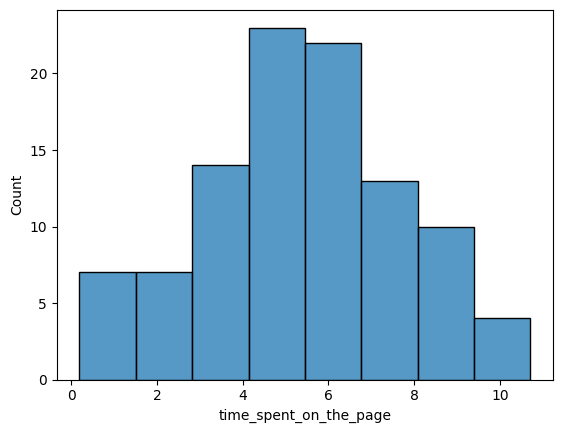

In [ ]:
sns.histplot(data=df, x='time_spent_on_the_page')

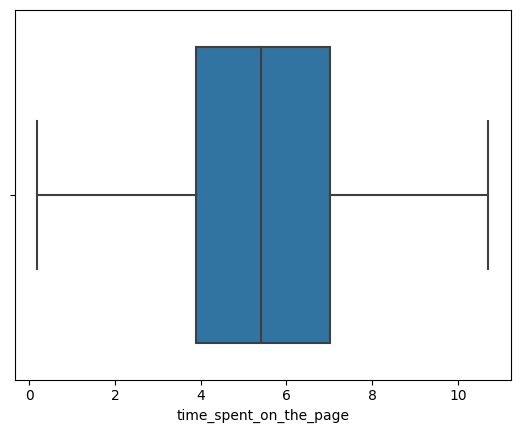

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page');

In [ ]:
df['group'].nunique() 

2

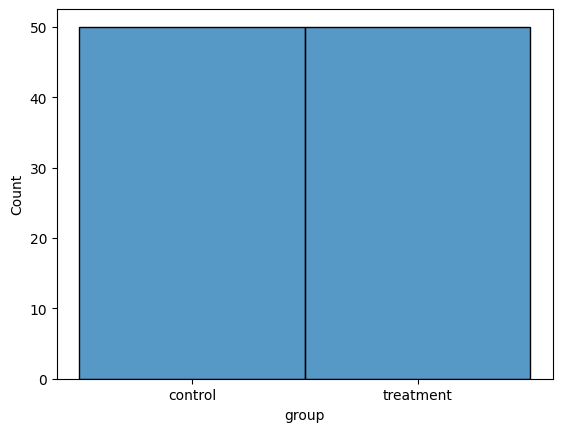

(array([0, 1]), [Text(0, 0, 'control'), Text(1, 0, 'treatment')])

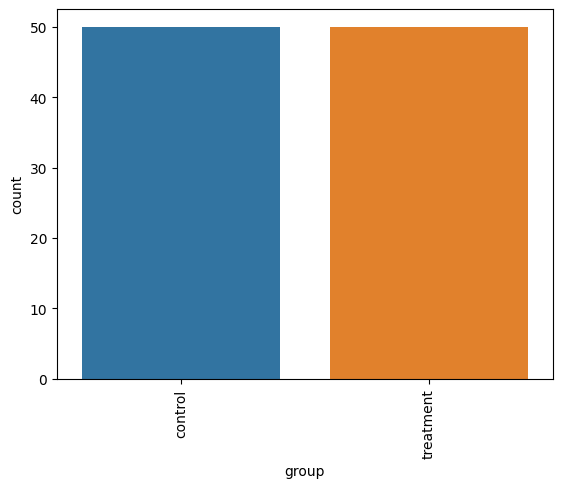

In [ ]:
sns.histplot(data=df,x='group')
plt.show()
sns.countplot(data=df,x='group')
plt.xticks(rotation = 90)

In [ ]:
df['landing_page'].nunique() 

2

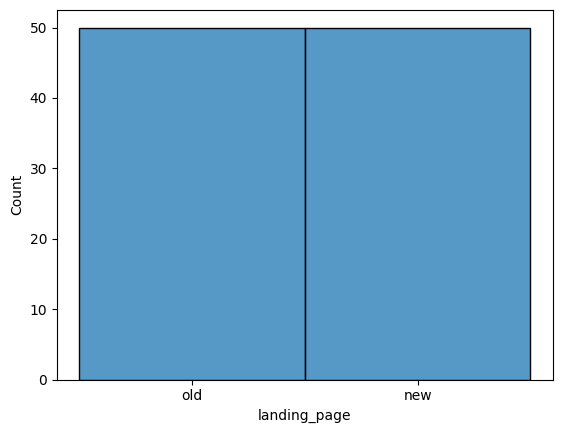

(array([0, 1]), [Text(0, 0, 'old'), Text(1, 0, 'new')])

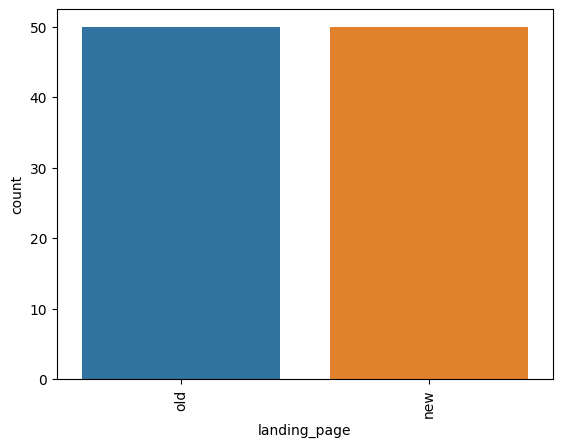

In [ ]:
sns.histplot(data=df,x='landing_page')
plt.show()
sns.countplot(data=df,x='landing_page')
plt.xticks(rotation = 90)

In [ ]:
df['converted'].nunique() 

2

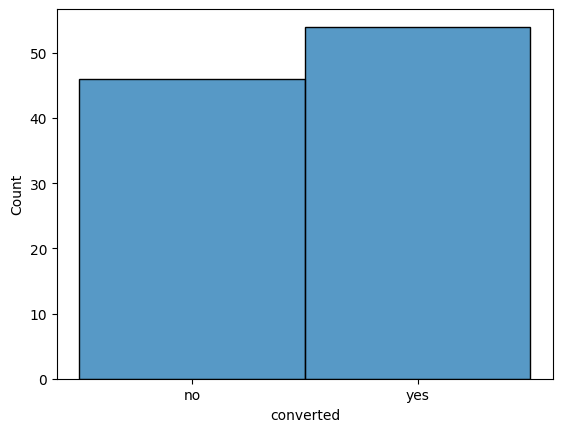

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

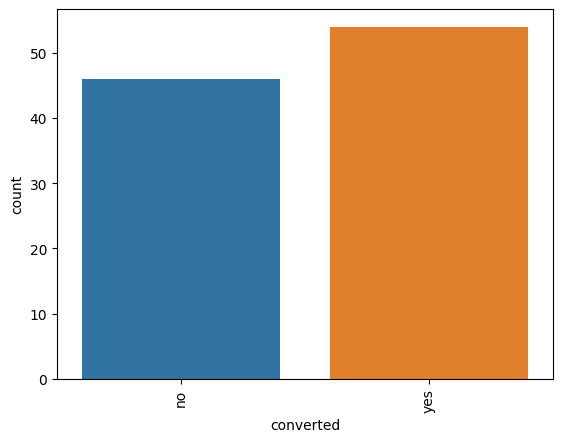

In [ ]:
sns.histplot(data=df,x='converted')
plt.show()
sns.countplot(data=df,x='converted')
plt.xticks(rotation = 90)

In [ ]:
df['language_preferred'].nunique() 

3

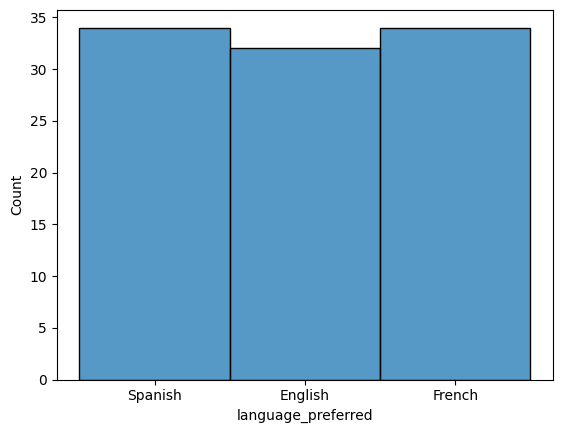

(array([0, 1, 2]),
 [Text(0, 0, 'Spanish'), Text(1, 0, 'English'), Text(2, 0, 'French')])

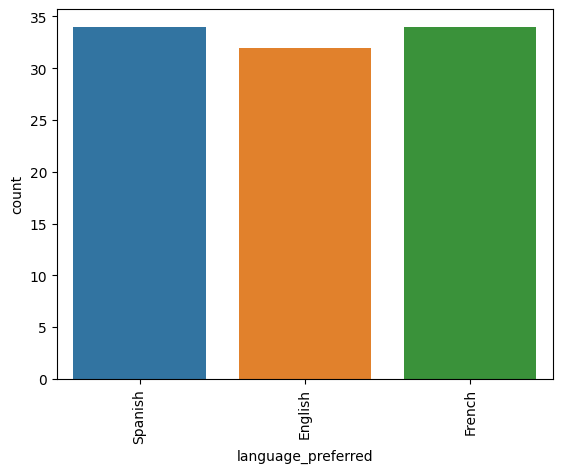

In [ ]:
sns.histplot(data=df,x='language_preferred')
plt.show()
sns.countplot(data=df,x='language_preferred')
plt.xticks(rotation = 90)

In [ ]:
df['user_id'].nunique() 

100

####Observations on Univarient Analysis:
- There are 100 unique users
- There are 3 unique languages 
- Half users are using old landing page and rest half is using new landing page. 
- Time spant on the page is distributed evenly. It is normarl distribution.
- The users who read in English are lessed than French and Spanish.

### Bivariate Analysis

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


<ipython-input-24-1b6d144b6c60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df[['user_id','group','landing_page','time_spent_on_the_page','converted', 'language_preferred']].corr());


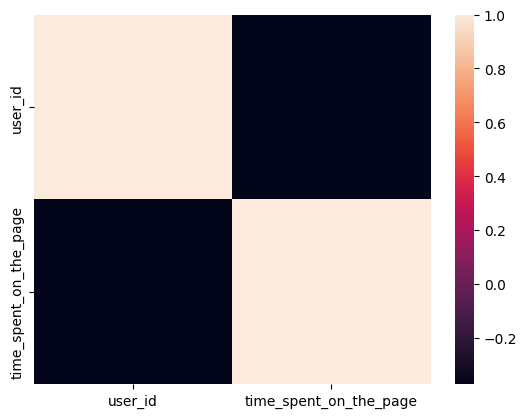

In [ ]:
sns.heatmap(data=df[['user_id','time_spent_on_the_page',]].corr());

####Obersvation of Bi-varient analysis:
- There is no co-relation between user_id vs time_spent_on_the_page
- rest other columns are having categorical values.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


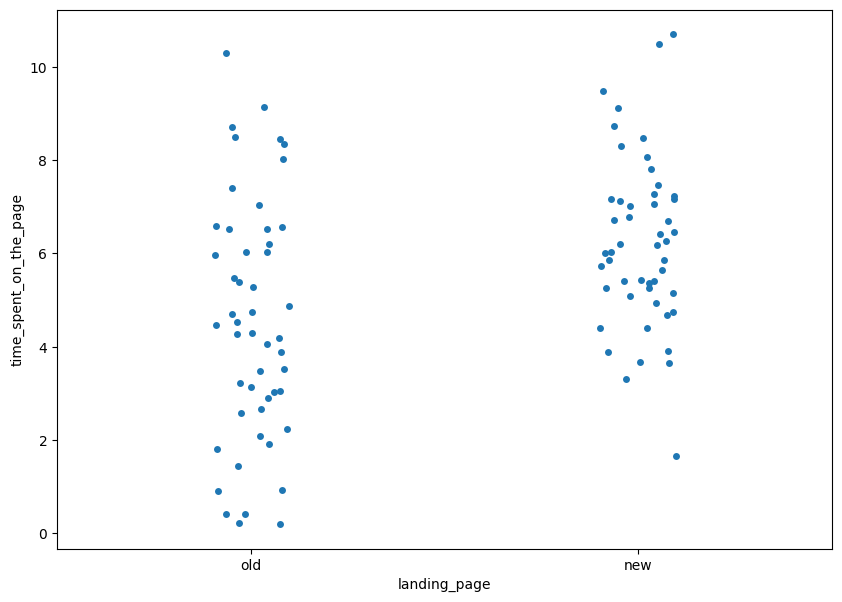

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=df, x='landing_page', y='time_spent_on_the_page', jitter=True);

<ipython-input-27-9251093fbfad>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df, x="landing_page", y="time_spent_on_the_page", palette='pastel');


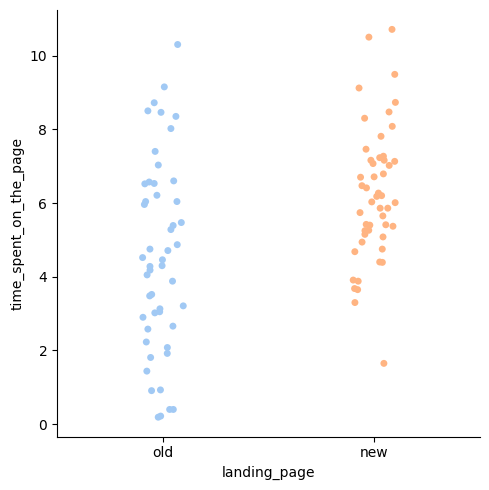

In [ ]:
sns.catplot(data=df, x="landing_page", y="time_spent_on_the_page", palette='pastel');

####Observation:
- The minimun time spent on the new langing page is more than old. 

Step 1: Define the null and alternate hypotheses

####NULL Hypothesis:
 𝜇1 = Time spent on the NEW landing page
 𝜇2 = Time spent on the OLD landing page

 H0 : 𝜇1 <= 𝜇2

 ####Alternative Hypothesis:

 Ha : 𝜇1 > 𝜇2

 -Level of significance  : 0.05

### Step 2: Select Appropriate test

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
d_time = df.pivot(columns= 'landing_page', values= 'time_spent_on_the_page')

In [ ]:
d_time.head()

landing_page,new,old
0,NaN,3.48
1,7.13,NaN
2,4.40,NaN
3,NaN,3.02
4,4.75,NaN


In [ ]:
d_time.describe()

landing_page,new,old
count,50.000000,50.000000
mean,6.223200,4.532400
std,1.817031,2.581975
min,1.650000,0.190000
25%,5.175000,2.720000
50%,6.105000,4.380000
75%,7.160000,6.442500
max,10.710000,10.300000


In [ ]:
print('Mean: time spent on NEW Page: ', d_time['new'].mean())
print('Mean: time spent on OLD Page: ', d_time['old'].mean())
print('Standard Deviation of time spent on NEW page: ', d_time['new'].std())
print('Standard Deviation of time spent on OLD page: ', d_time['old'].std())

Mean: time spent on NEW Page:  6.223199999999999
Mean: time spent on OLD Page:  4.532400000000001
Standard Deviation of time spent on NEW page:  1.8170310387878263
Standard Deviation of time spent on OLD page:  2.581974849306046


### Step 3: Decide the significance level

It is going to  be Two Independent Sample T-test for Equality of Means - Unequal Standard Deviations.

#### From above obersvations: To use correct test: 
1. Time spent column is continuous data type
2. It is normal distribution
3. it has random sampling
4. Standard deviation are not same

### Step 4: Collect and prepare data

####Check above number 2 for preparation of data

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind # Import the function

In [ ]:
test_stat, p_value = ttest_ind(d_time['new'].dropna(), d_time['old'].dropna(), equal_var= False, alternative='greater')
print('p_value: ', p_value)

p_value:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

####Observation: 
- p_value is so less than the levle of significance, hence we can reject the null hypothesis
- This means, user is spending more time on NEW landing page than OLD planding page.

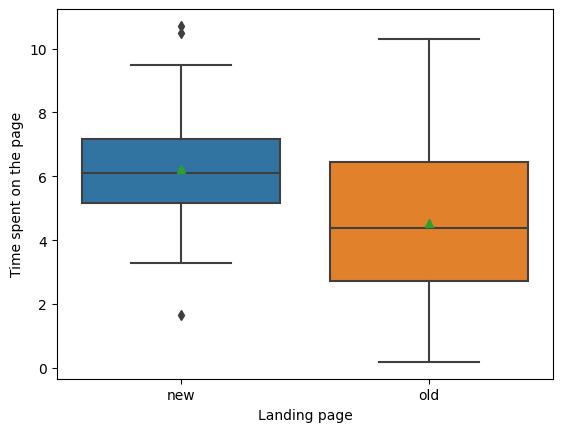

In [ ]:
sns.boxplot(data = d_time, showmeans = True) 
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.show()

####Observation: 

1. Minimum time spent
    - New landing page = 3 minutes
    - Old landing page = 0 minutes
2. Maximum time spent: 
    - New landing page = 9 minutes
    - Old landing page = 10 minutes
3. Outliers:
    - New Landing page:  it has outliers both sides
    - Old landing page : It does not have any outliers
4. Mean time:
    - NEW landing page: is equal to 50 percentile
    - Old landing page: is overlaping 50 perventile

### Step 7:  Draw inference

In [ ]:
sns.boxplot(data = d_time, showmeans = True) 
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.show()

####Observation: 

1. Minimum time spent
    - New landing page = 3 minutes
    - Old landing page = 0 minutes
2. Maximum time spent: 
    - New landing page = 9 minutes
    - Old landing page = 10 minutes
3. Outliers:
    - New Landing page:  it has outliers both sides
    - Old landing page : It does not have any outliers
4. Mean time:
    - NEW landing page: is equal to 50 percentile
    - Old landing page: is overlaping 50 perventile

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Step 1: Define the null and alternate hypotheses

p1 = proportion of users who visited the NEW landing page and got coverted

p2 = proportion of users who visited the OLD landing page and got coverted


####NULL Hypothesis:

H0: p1 <= p2


####Alternative Hypothesis:

Ha: p1 > p2


-Level of significance  : 0.05

Step 2: Data preparation:

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
d_convert = df.pivot(columns='landing_page', values='converted')

In [ ]:
d_convert.head()

landing_page,new,old
0,NaN,no
1,yes,NaN
2,no,NaN
3,NaN,no
4,yes,NaN


In [ ]:
print(d_convert['new'].value_counts())

yes    33
no     17
Name: new, dtype: int64


In [ ]:
print(d_convert['old'].value_counts())

no     29
yes    21
Name: old, dtype: int64


Step3: Which test to pick????

- 2 Proportion Z-Test is the right choice:
Conditions to match: 

IF np and n(1-p) for both landing pages are >= 10 : YES

n = 50
p1 = 33/50
p2 = 21/50

np1 = 33

n(1-p1) = 17

np2 = 21

n(1-p2) = 29

####Observation for assumption for Z-test:
 - It is binomial distribution :yes
 - np and n(1-p) for both landing pages are >= 10 : YES
 - independent population : True
 - random sampling : True
 

Step4: Test performance: 


In [ ]:

from statsmodels.stats.proportion import proportions_ztest # import the function

In [ ]:
c_count = np.array([33,21]) # converted landing pages (old and new))
nobs = np.array([50,50]) # Total observation for old and new landing pages

test_stat, p_value = proportions_ztest(c_count, nobs, alternative = 'larger') 

print(p_value)

0.008026308204056278


####Observations:

- p_value is lass than level of significance, hence, we can reject NULL hypothesis
- The conversation rate for NEW landing pages are grater thane conversation rate for OLD landing page

STEP 5: Visulazation:

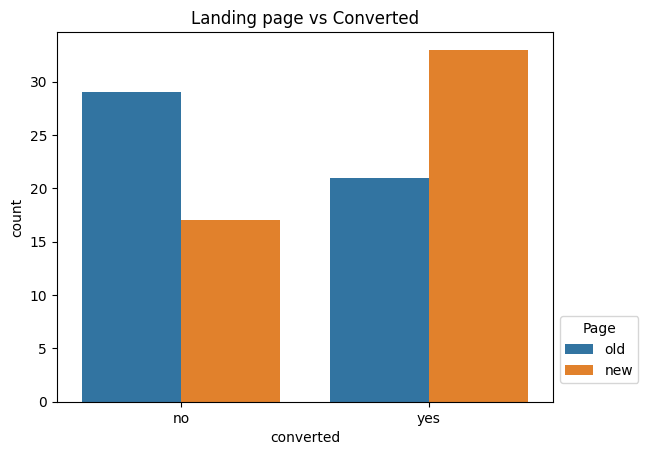

In [ ]:
ax = sns.countplot(hue = 'landing_page', data = df, x = 'converted')

plt.title('Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.25))
plt.show()

####Observations: 
- 33 users successfully landed to NEW landing page
- 21 users successfully landed to OLD landing page

## 3. Is the conversion and preferred language are independent or related?

Step 1: Define the null and alternate hypotheses

#### NULL Hypothesis:

H0: Conversion is independent on prefered language

#### Alternative Hypothesis: 

Ha: Conversion is dependent on prefered language

-Level of significance  : 0.05

Step 2: Data preparation:

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
d_con = pd.crosstab(df['converted'], df['language_preferred'])

In [ ]:
d_con.head()

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


Step3: Which test to pick????

Conversion depends on prefreed language then Chi-Squre Test for Independence is the right one

####Observation for assumption: 
 - both columns ('converted' & 'language_preferred') are categorical columns values : True
 - expected value of number of observation sample in each level of varialbes is atleast =5: In our case it is grater than 5
 - random sampling : TRue

Step4: Test performance:

In [ ]:
from scipy.stats import chi2_contingency #importing function

In [ ]:
from scipy.stats.contingency import expected_freq
chi, pval, dof, expected_freq = chi2_contingency(d_con)
print(pval)

0.21298887487543447


####Observation: 

- p_value is grater than level of significance (5%), hence, we can fail to reject th e null hypothesis.
- In other words, Conversion is independent on prefered language is true.

STEP 5: Visulazation:

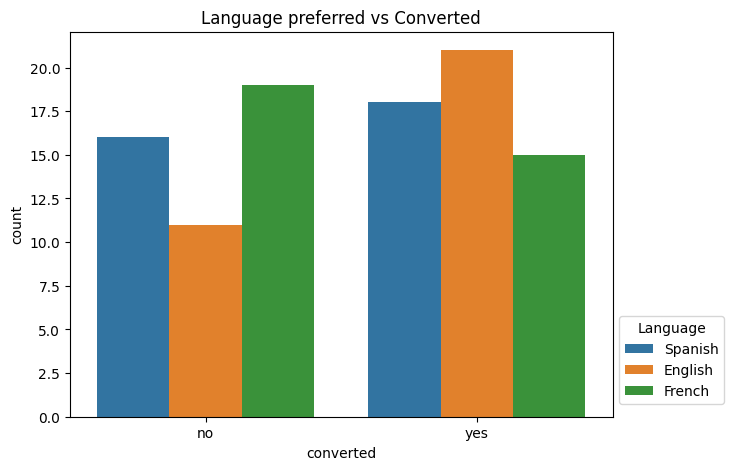

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = df, x = 'converted')
plt.title('Language preferred vs Converted')
plt.legend(title = 'Language', bbox_to_anchor = (1,0.28))
plt.show()

####Observations: 

1. The conversion of user prefred language : "English is the highest followed by Spenish , then French
2. users prefrering French is the lowest

## 4. Is the time spent on the new page same for the different language users?

Step 1: Define the null and alternate hypotheses

####NULL Hypothesis: 

H0: The time spent on the NEW landing page are equal for all lagugages

####Alternative Hypothesis: 

Ha: The time spent on the NEW landing page , atleast one of the three language is different

-Level of significance  : 0.05

Step 2: Data preparation:

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
d_pg =  df[df['landing_page']=='new'] 

In [ ]:
d_pg.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [ ]:
d_pg['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [ ]:
d_pg.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Step 3: Which test to pick????

####Based on given information, I'll try, One-way ANOVA F-Test

#### Normality check with Shapiro-Wilk's Test: 
  - NULL Hypothesis: 
    
    H0: Time spent follows normal distribution

  - Alternative Hypothesis: 

    Ha: Time spent does not follow normal distribution

  - Level of significance is 0.05


In [ ]:
from scipy.stats import shapiro # import Shapiro-Wilk's function

In [ ]:
test_stat, p_value = shapiro(d_pg['time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.8040016293525696


####Observation: 
- P_value is greated than level of significance , hence we can fail to reject NULL Hypothesis. 
- it is normal distribution.

####Equality Check with Levene's Test: 

  - NULL Hypothesis:

    H0: All the population variances are qual

  - Alternative Hypothesis: 

    Ha: Atleast one variance is different from the rest

In [ ]:
from scipy.stats import levene # import the function

In [ ]:

test_stat, p_value = levene(d_pg['time_spent_on_the_page'][d_pg['language_preferred']=='English'],
                            d_pg['time_spent_on_the_page'][d_pg['language_preferred']== 'French'],
                            d_pg['time_spent_on_the_page'][d_pg['language_preferred']=='Spanish'])
print('p-value : ', p_value)

p-value :  0.46711357711340173


####Observation: 

- p_vale is greater than the level of significance, hence we can fail to reject the NULL hypothesis.
- Variances for all the response variables are equal

#### If ANOVA test assumptions: 

- Populations are normally distributed: TRue
- Population variances are equal: True
- Independent random samples: True

Step 4: Test performance:

In [ ]:
from scipy.stats import f_oneway

In [ ]:
test_stat, p_value = f_oneway(d_pg.loc[d_pg['language_preferred']=='English','time_spent_on_the_page'],
                              d_pg.loc[d_pg['language_preferred']=='French','time_spent_on_the_page'],
                              d_pg.loc[d_pg['language_preferred']=='Spanish','time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.43204138694325955


####Observation: 

- P_value is grater than the level of significance , hence we can fail to reject he NULL Hypothesis.
- The time spent of new landing page for differernt language users are equal.

STEP 5: Visulazation:

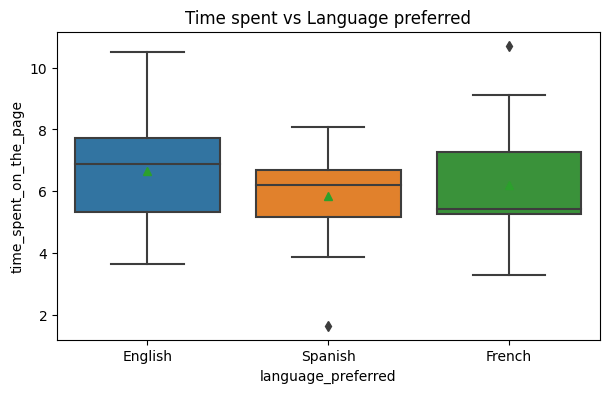

In [ ]:
plt.figure(figsize = (7,4))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = d_pg, showmeans = True)
plt.title('Time spent vs Language preferred')
plt.show()

####Observations: 

1. the IQR of time spent is almost same for English and French: 4 to 7 minutes
2. The 1st quartile time is near to 5 minutes for all laguages.
3. Outliers spotted for French and Spanish
4. 

## Conclusion and Business Recommendations

####Observations:

1. Users spend more time on NEW Landing page than the OLD Landing page.
2. Also, Conversion for NEW landing page is greateer than the OLD landing Page.
3. The Converted status is independent on prefred language.
4. The time spent/ Mean time spent on the NEW landing page is the same for different language users.

___

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
!jupyter nbconvert ENews_Express_Fullcode_Dhwani_Trivedi.ipynb --to html 

[NbConvertApp] Converting notebook ENews_Express_Fullcode_Dhwani_Trivedi.ipynb to html
[NbConvertApp] Writing 1078878 bytes to ENews_Express_Fullcode_Dhwani_Trivedi.html
